In [1]:
!unzip -q /content/drive/MyDrive/dubna_hack/weather-forecast-hackathon.zip

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tqdm
dict_weather = {
    "longitude": [],
    "latitude": [],
    "hour": [],
    "cloud_cover": [],
    "elevation": [],
    "humidity": [],
    "pressure": [],
    "temperature": [],
    "wind_dir": [],
    "wind_speed": [],
}
for hour in tqdm.tqdm(range(43)):
  for y in range(30):
    for x in range(30):
      dict_weather["longitude"].append(x)
      dict_weather["latitude"].append(y)
      dict_weather["hour"].append(hour)

      dict_weather["cloud_cover"].append(np.load("/content/cloud_cover.npy")[hour][y][x])
      dict_weather["elevation"].append(np.load("/content/elevation.npy")[y][x])
      dict_weather["humidity"].append(np.load("/content/humidity.npy")[hour][y][x])
      dict_weather["pressure"].append(np.load("/content/pressure.npy")[hour][y][x])
      dict_weather["temperature"].append(np.load("/content/temperature.npy")[hour][y][x])
      dict_weather["wind_dir"].append(np.load("/content/wind_dir.npy")[hour][y][x])
      dict_weather["wind_speed"].append(np.load("/content/wind_speed.npy")[hour][y][x])

100%|██████████| 43/43 [01:16<00:00,  1.78s/it]


In [4]:
data = pd.DataFrame(dict_weather)

In [5]:
data.head()

,longitude,latitude,hour,cloud_cover,elevation,humidity,pressure,temperature,wind_dir,wind_speed
0,0,0,0,2.0,129.0,74.0,1006.000000,19.900000,111.0,20.1
1,1,0,0,2.0,116.0,74.0,1006.000000,20.000000,111.0,20.1
2,2,0,0,2.0,113.0,74.0,1006.000000,20.000000,111.0,20.1
3,3,0,0,3.0,115.0,73.0,1006.299988,19.400000,107.0,18.4
4,4,0,0,3.0,122.0,73.0,1006.299988,19.299999,107.0,18.4


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38700 entries, 0 to 38699
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   longitude    38700 non-null  int64  
 1   latitude     38700 non-null  int64  
 2   hour         38700 non-null  int64  
 3   cloud_cover  38700 non-null  float32
 4   elevation    38700 non-null  float32
 5   humidity     38700 non-null  float32
 6   pressure     38700 non-null  float32
 7   temperature  38700 non-null  float32
 8   wind_dir     38700 non-null  float32
 9   wind_speed   38700 non-null  float32
dtypes: float32(7), int64(3)
memory usage: 1.9 MB


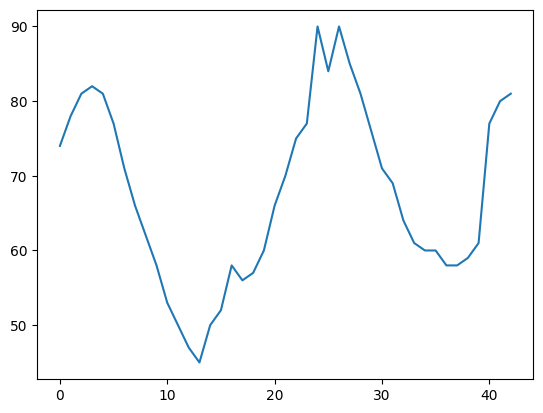

In [7]:
x = 0
y = 0
plt.plot(data[(data['latitude']==y) & (data['longitude']==x)]["hour"], data[(data['latitude']==y) & (data['longitude']==x)]["humidity"])
plt.show()

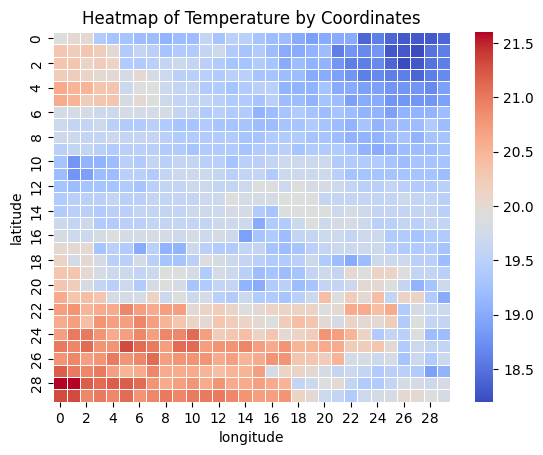

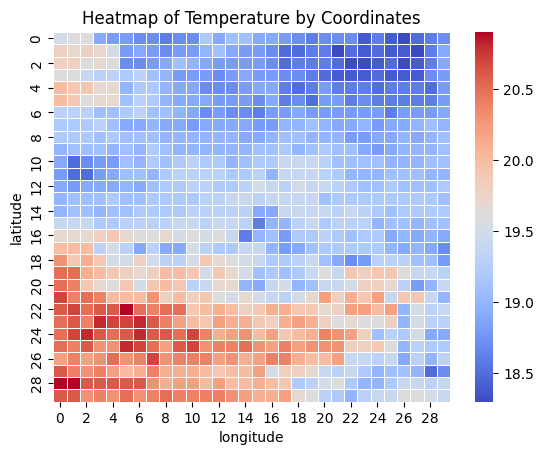

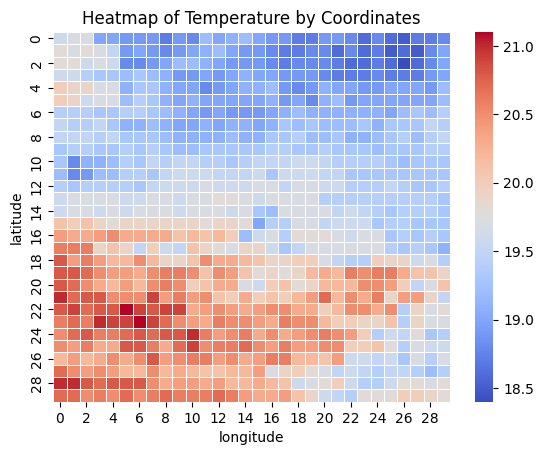

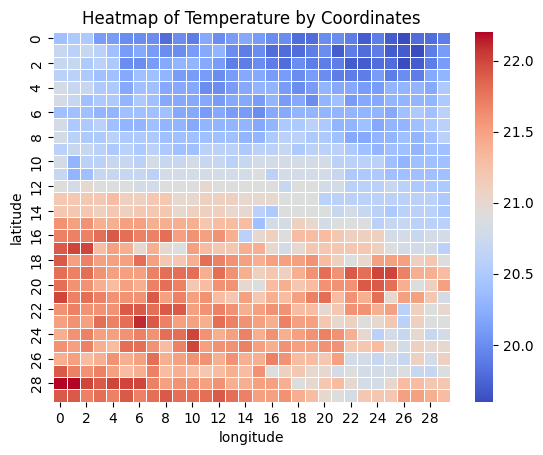

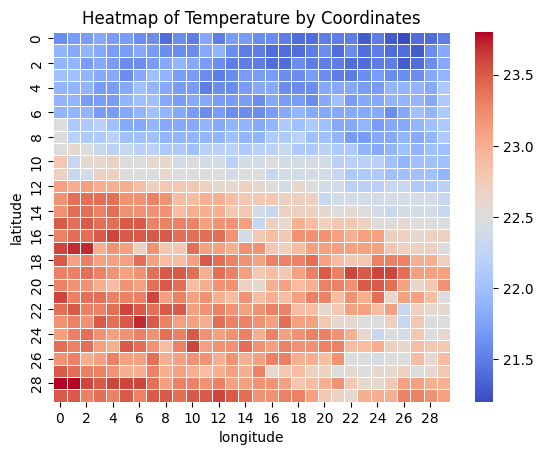

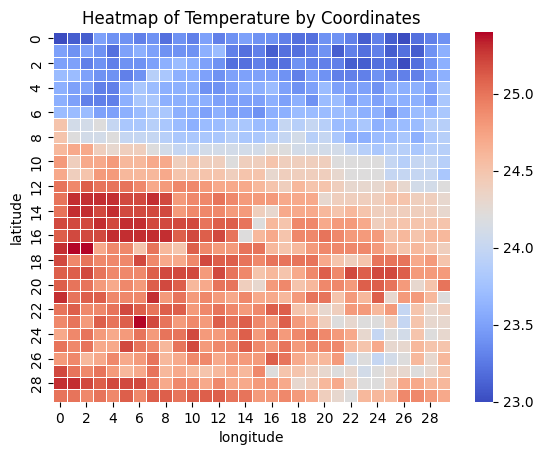

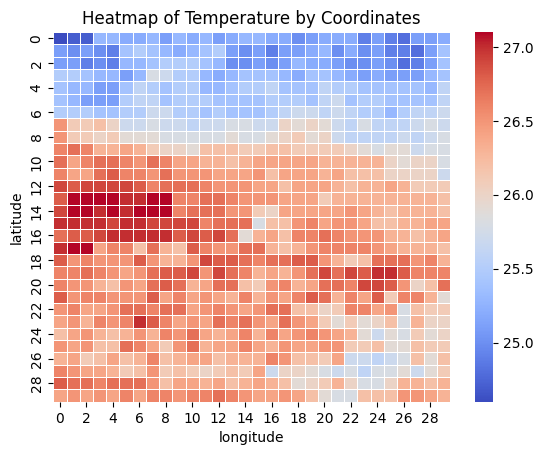

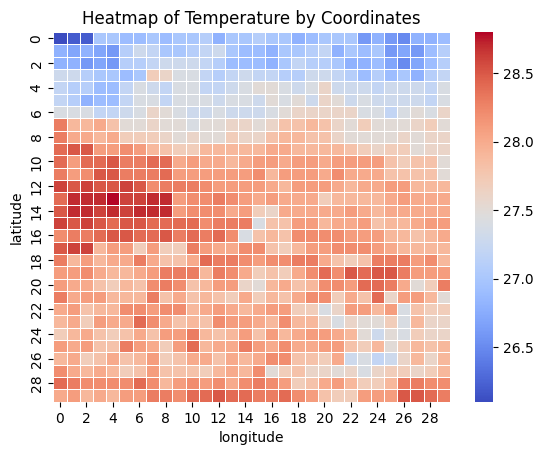

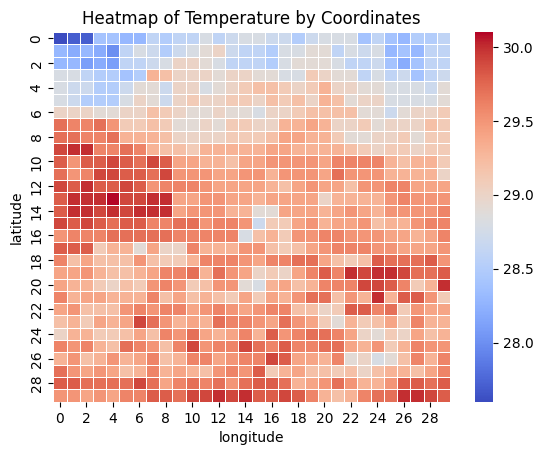

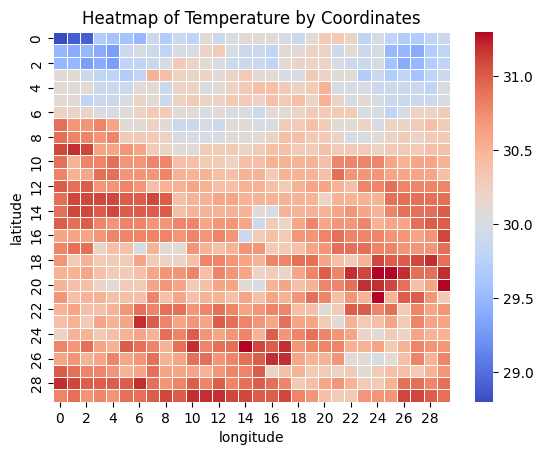

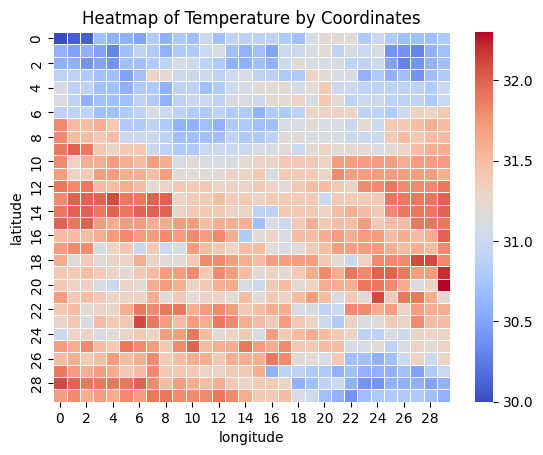

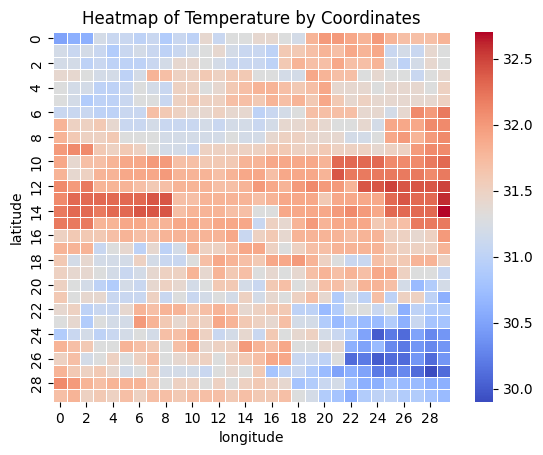

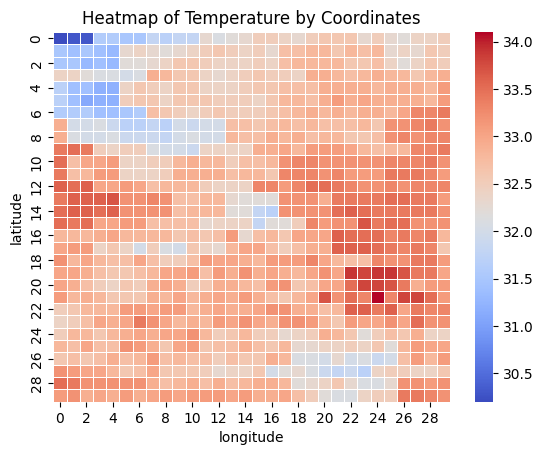

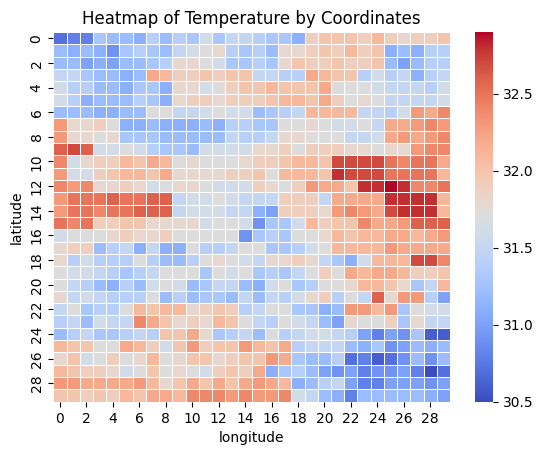

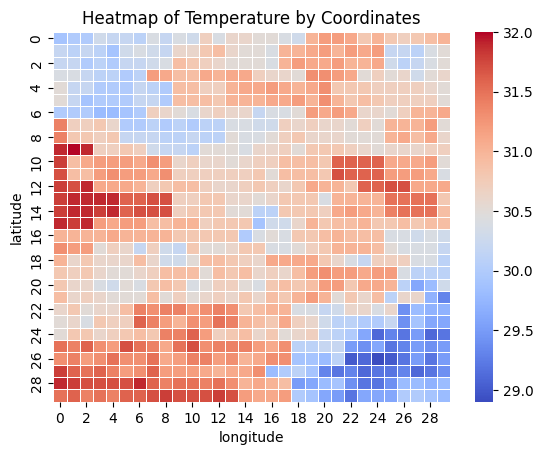

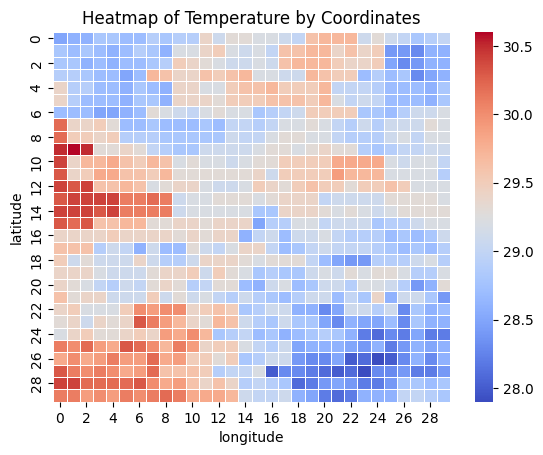

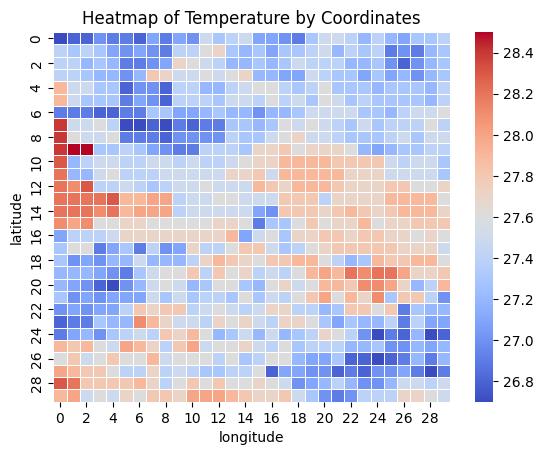

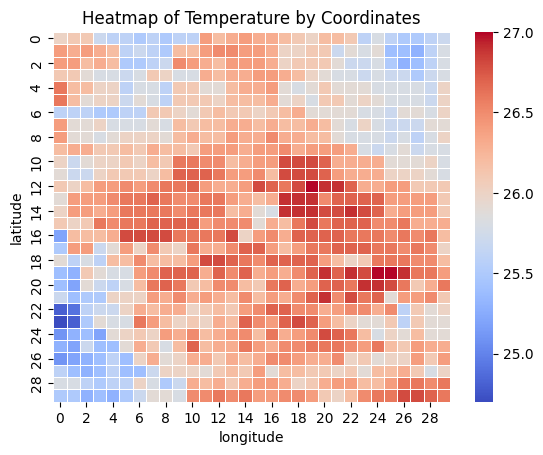

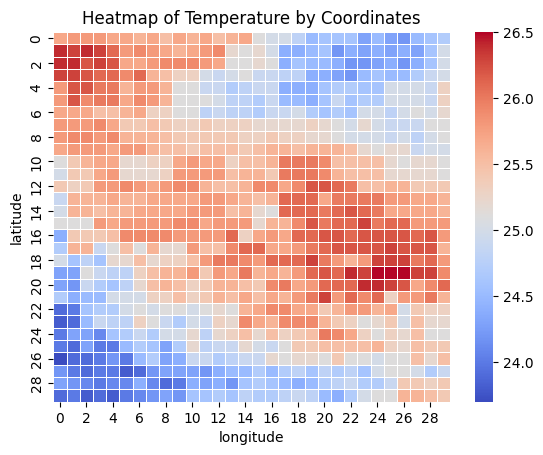

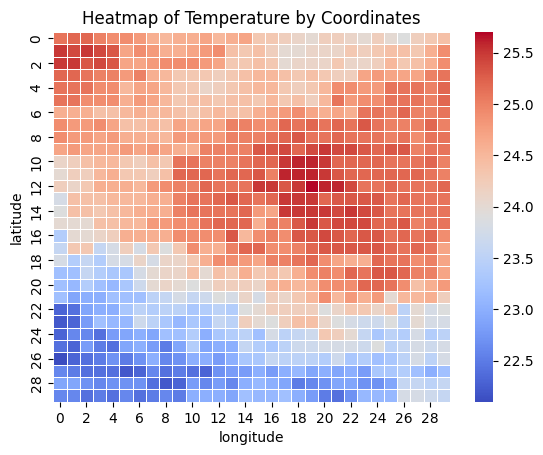

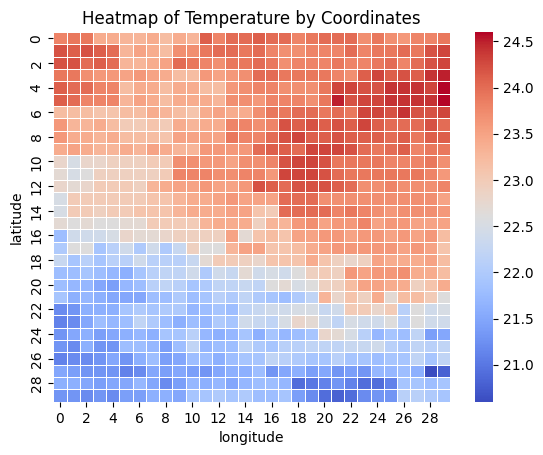

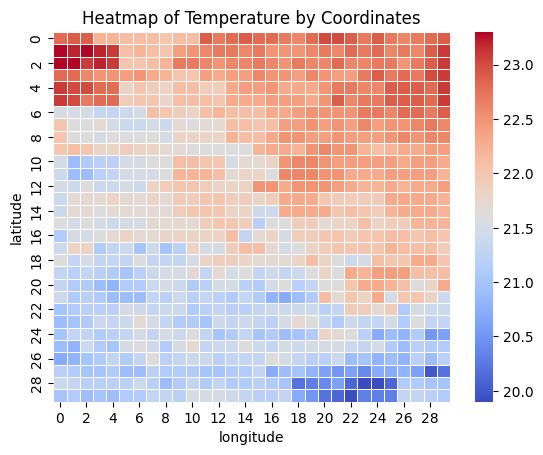

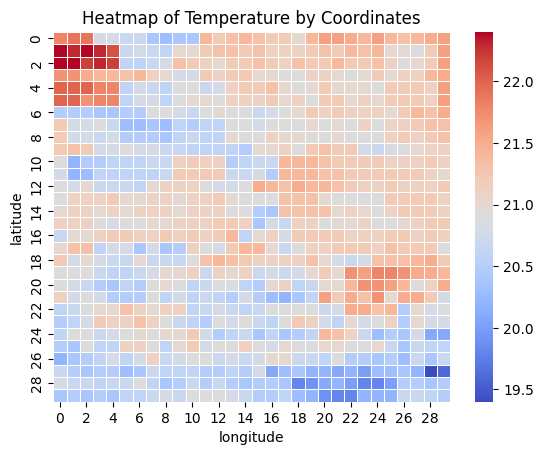

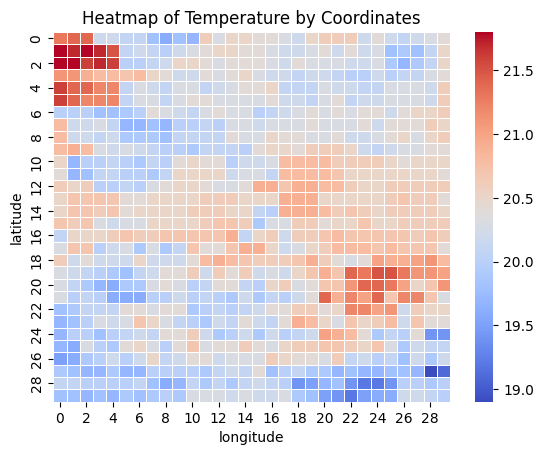

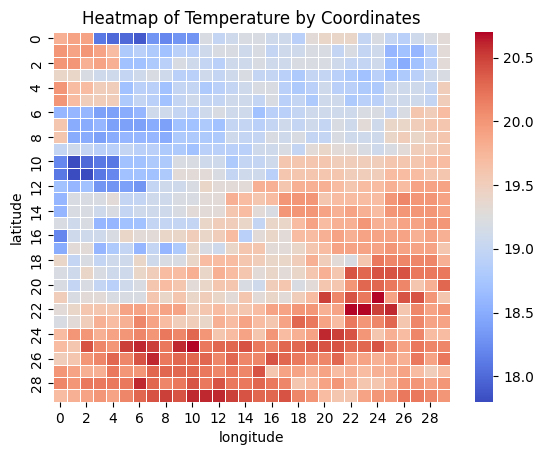

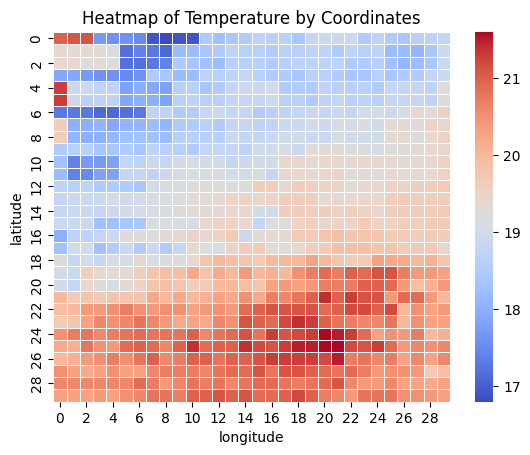

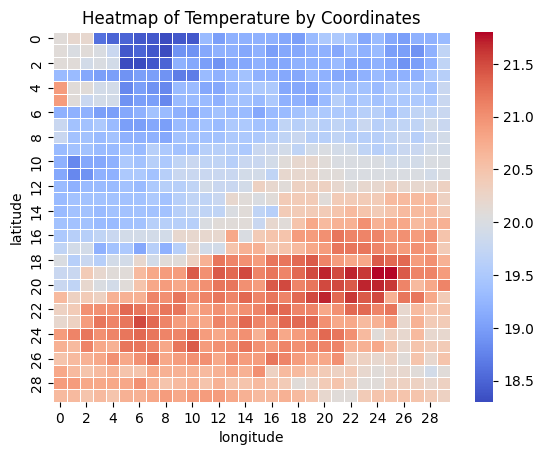

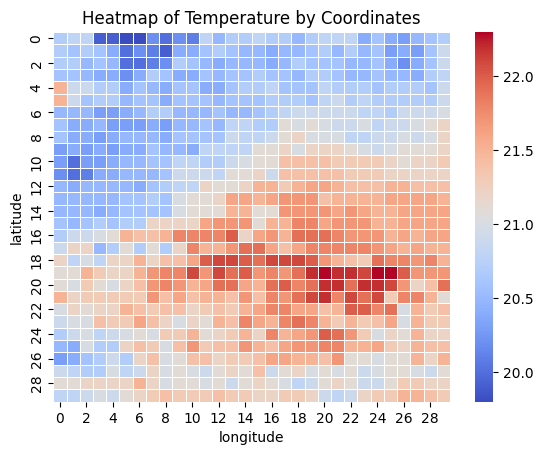

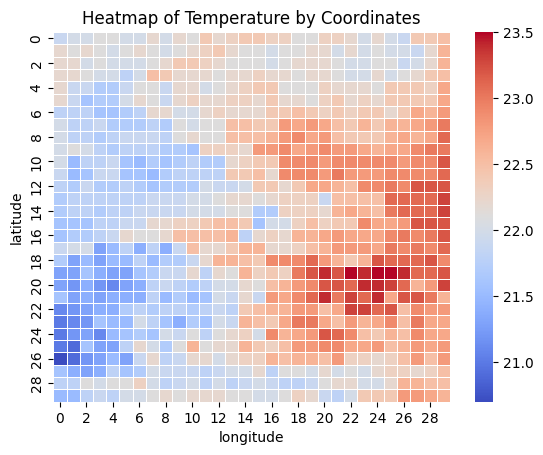

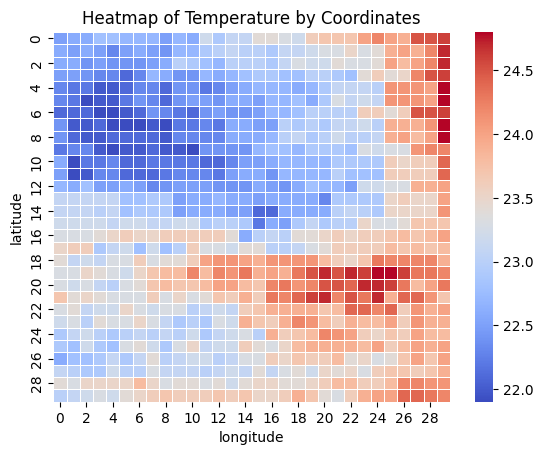

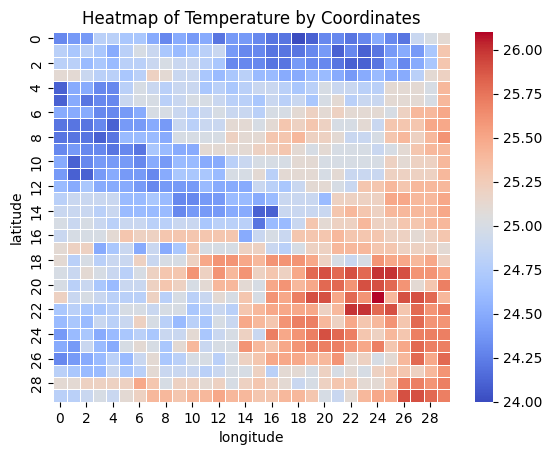

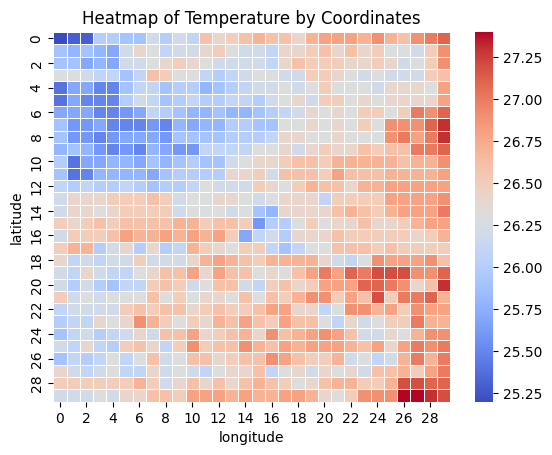

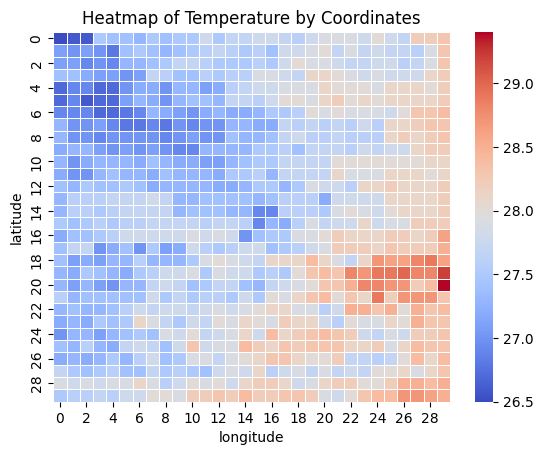

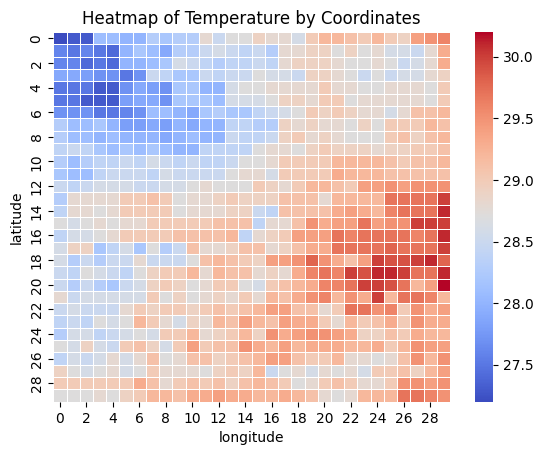

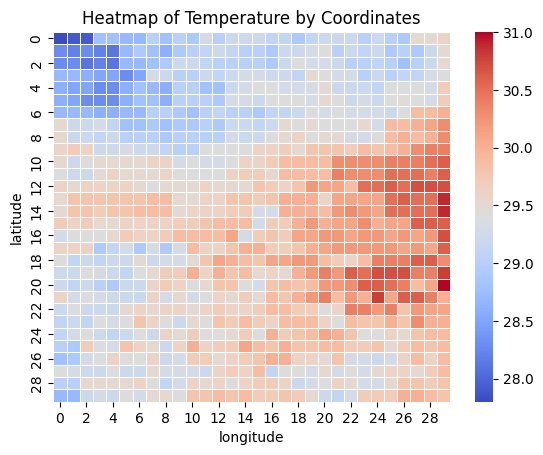

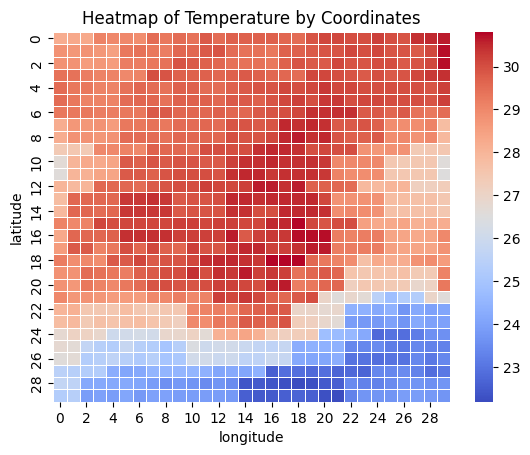

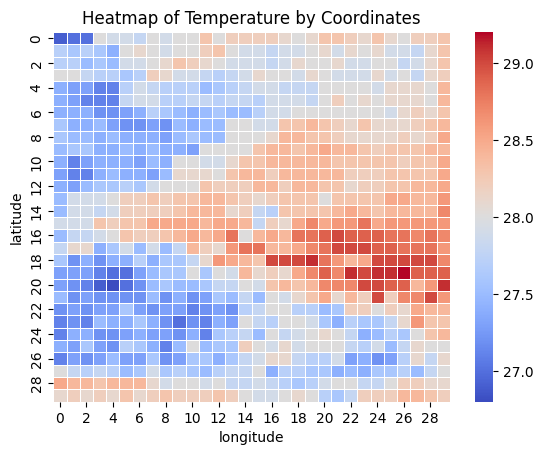

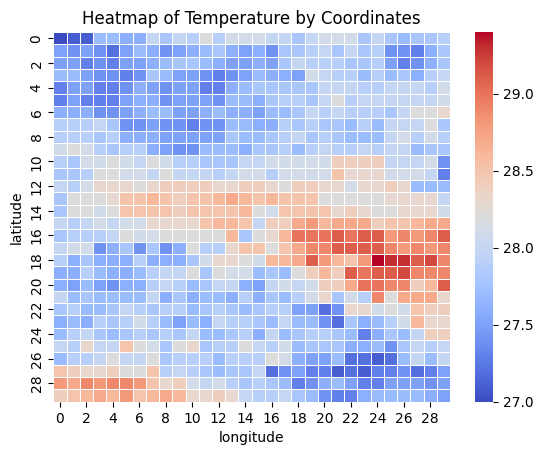

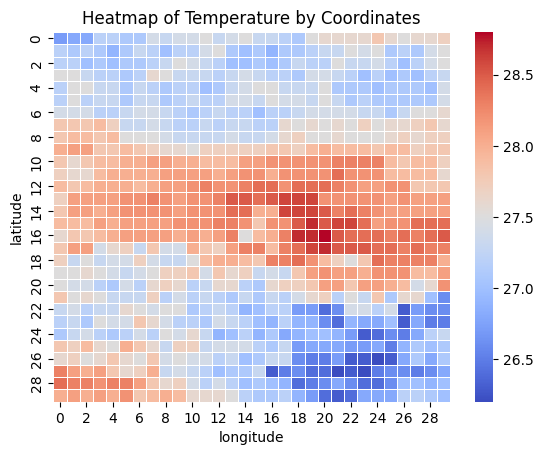

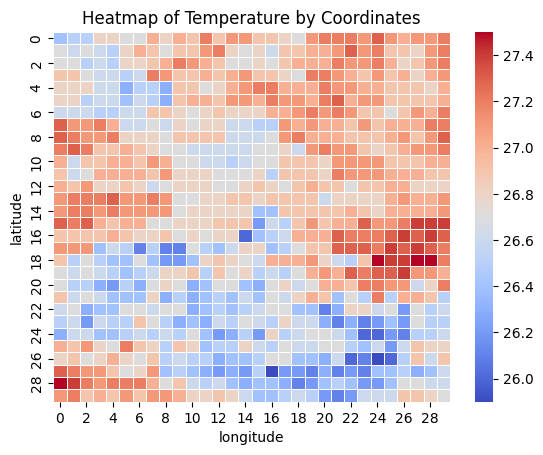

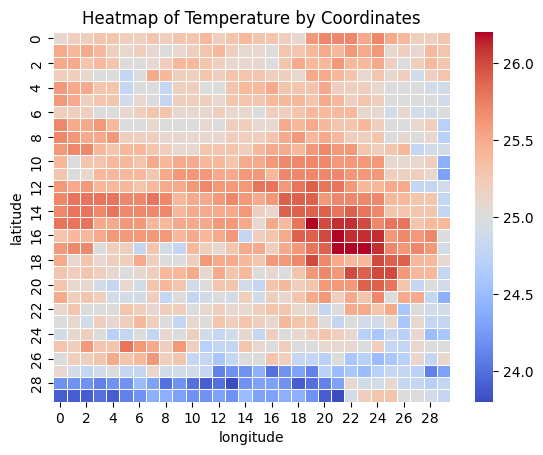

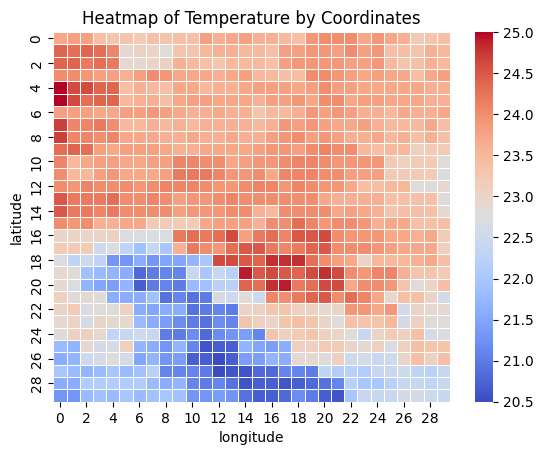

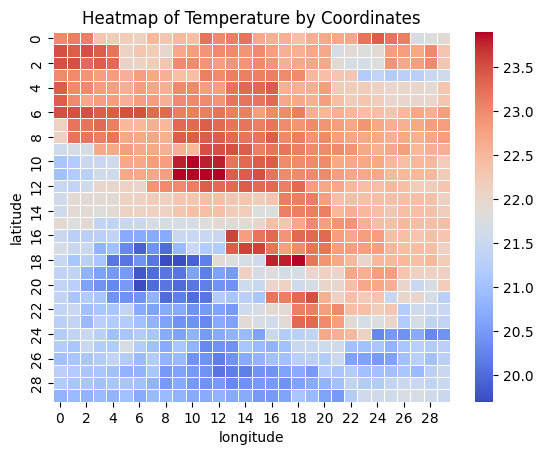

In [ ]:
for hour in range(43):
  pivot_df = data[data['hour'] == hour].drop(['hour', 'cloud_cover', 'elevation', 'humidity', 'pressure', 'wind_dir', 'wind_speed'], axis=1).pivot(index='latitude', columns='longitude', values='temperature')
  sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.5)
  plt.title('Heatmap of Temperature by Coordinates')
  plt.show()

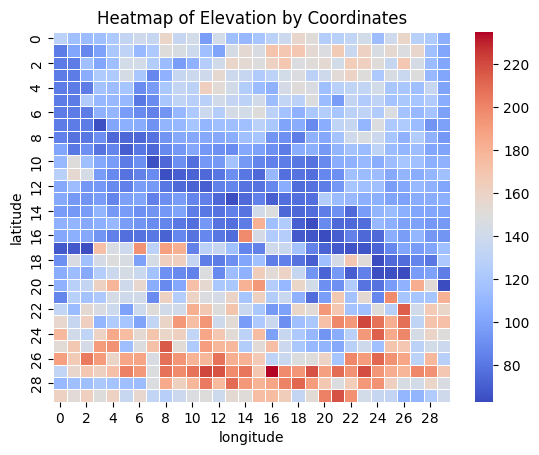

In [ ]:
pivot_df = data[data['hour'] == 5].drop(['hour', 'cloud_cover', 'temperature', 'humidity', 'pressure', 'wind_dir', 'wind_speed'], axis=1).pivot(index='latitude', columns='longitude', values='elevation')
sns.heatmap(pivot_df, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Elevation by Coordinates')
plt.show()

# Model

## etna catboost

In [3]:
!pip install -q etna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import warnings

warnings.filterwarnings(action="ignore", message="Torchmetrics v0.9")

In [5]:
from etna.datasets.tsdataset import TSDataset

/usr/local/lib/python3.10/dist-packages/etna/settings.py:37: UserWarning: etna[torch] is not available, to install it, run `pip install etna[torch]`
  warnings.warn("etna[torch] is not available, to install it, run `pip install etna[torch]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:45: UserWarning: wandb is not available, to install it, run `pip install etna[wandb]`
  warnings.warn("wandb is not available, to install it, run `pip install etna[wandb]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:62: UserWarning: etna[classification] is not available, to install it, run `pip install etna[classification]`
  warnings.warn("etna[classification] is not available, to install it, run `pip install etna[classification]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:71: UserWarning: etna[auto] is not available, to install it, run `pip install etna[auto]`
  warnings.warn("etna[auto] is not available, to install it, run `pip install etna[auto]`")
/usr/loc

In [6]:
from datetime import datetime

def hour_to_datetime(hour):
    # Получаем текущую дату
    current_date = pd.Timestamp.now().date()

    # Создаем объект Timestamp с заданным часом
    timestamp = pd.Timestamp.combine(current_date, pd.Timestamp.min.time()) + pd.Timedelta(hours=hour)

    return timestamp

In [80]:
import tqdm
segments = ["cloud_cover", "humidity", "pressure", "temperature", "wind_dir", "wind_speed"]

dict_weather_etna = {
    "timestamp": [],
    "segment": [],
    "target": []
}
for segment in segments:
  for hour in tqdm.tqdm(range(43)):
    for y in range(30):
      for x in range(30):
        dict_weather_etna["timestamp"].append(hour_to_datetime(hour))
        dict_weather_etna["target"].append(np.load(f"/content/{segment}.npy")[hour][y][x])
        dict_weather_etna["segment"].append(f"{x}_{y}_{segment}")
etna_data = pd.DataFrame(dict_weather_etna)
df = TSDataset.to_dataset(etna_data)
ts = TSDataset(df, freq="H")

100%|██████████| 43/43 [00:09<00:00,  4.33it/s]


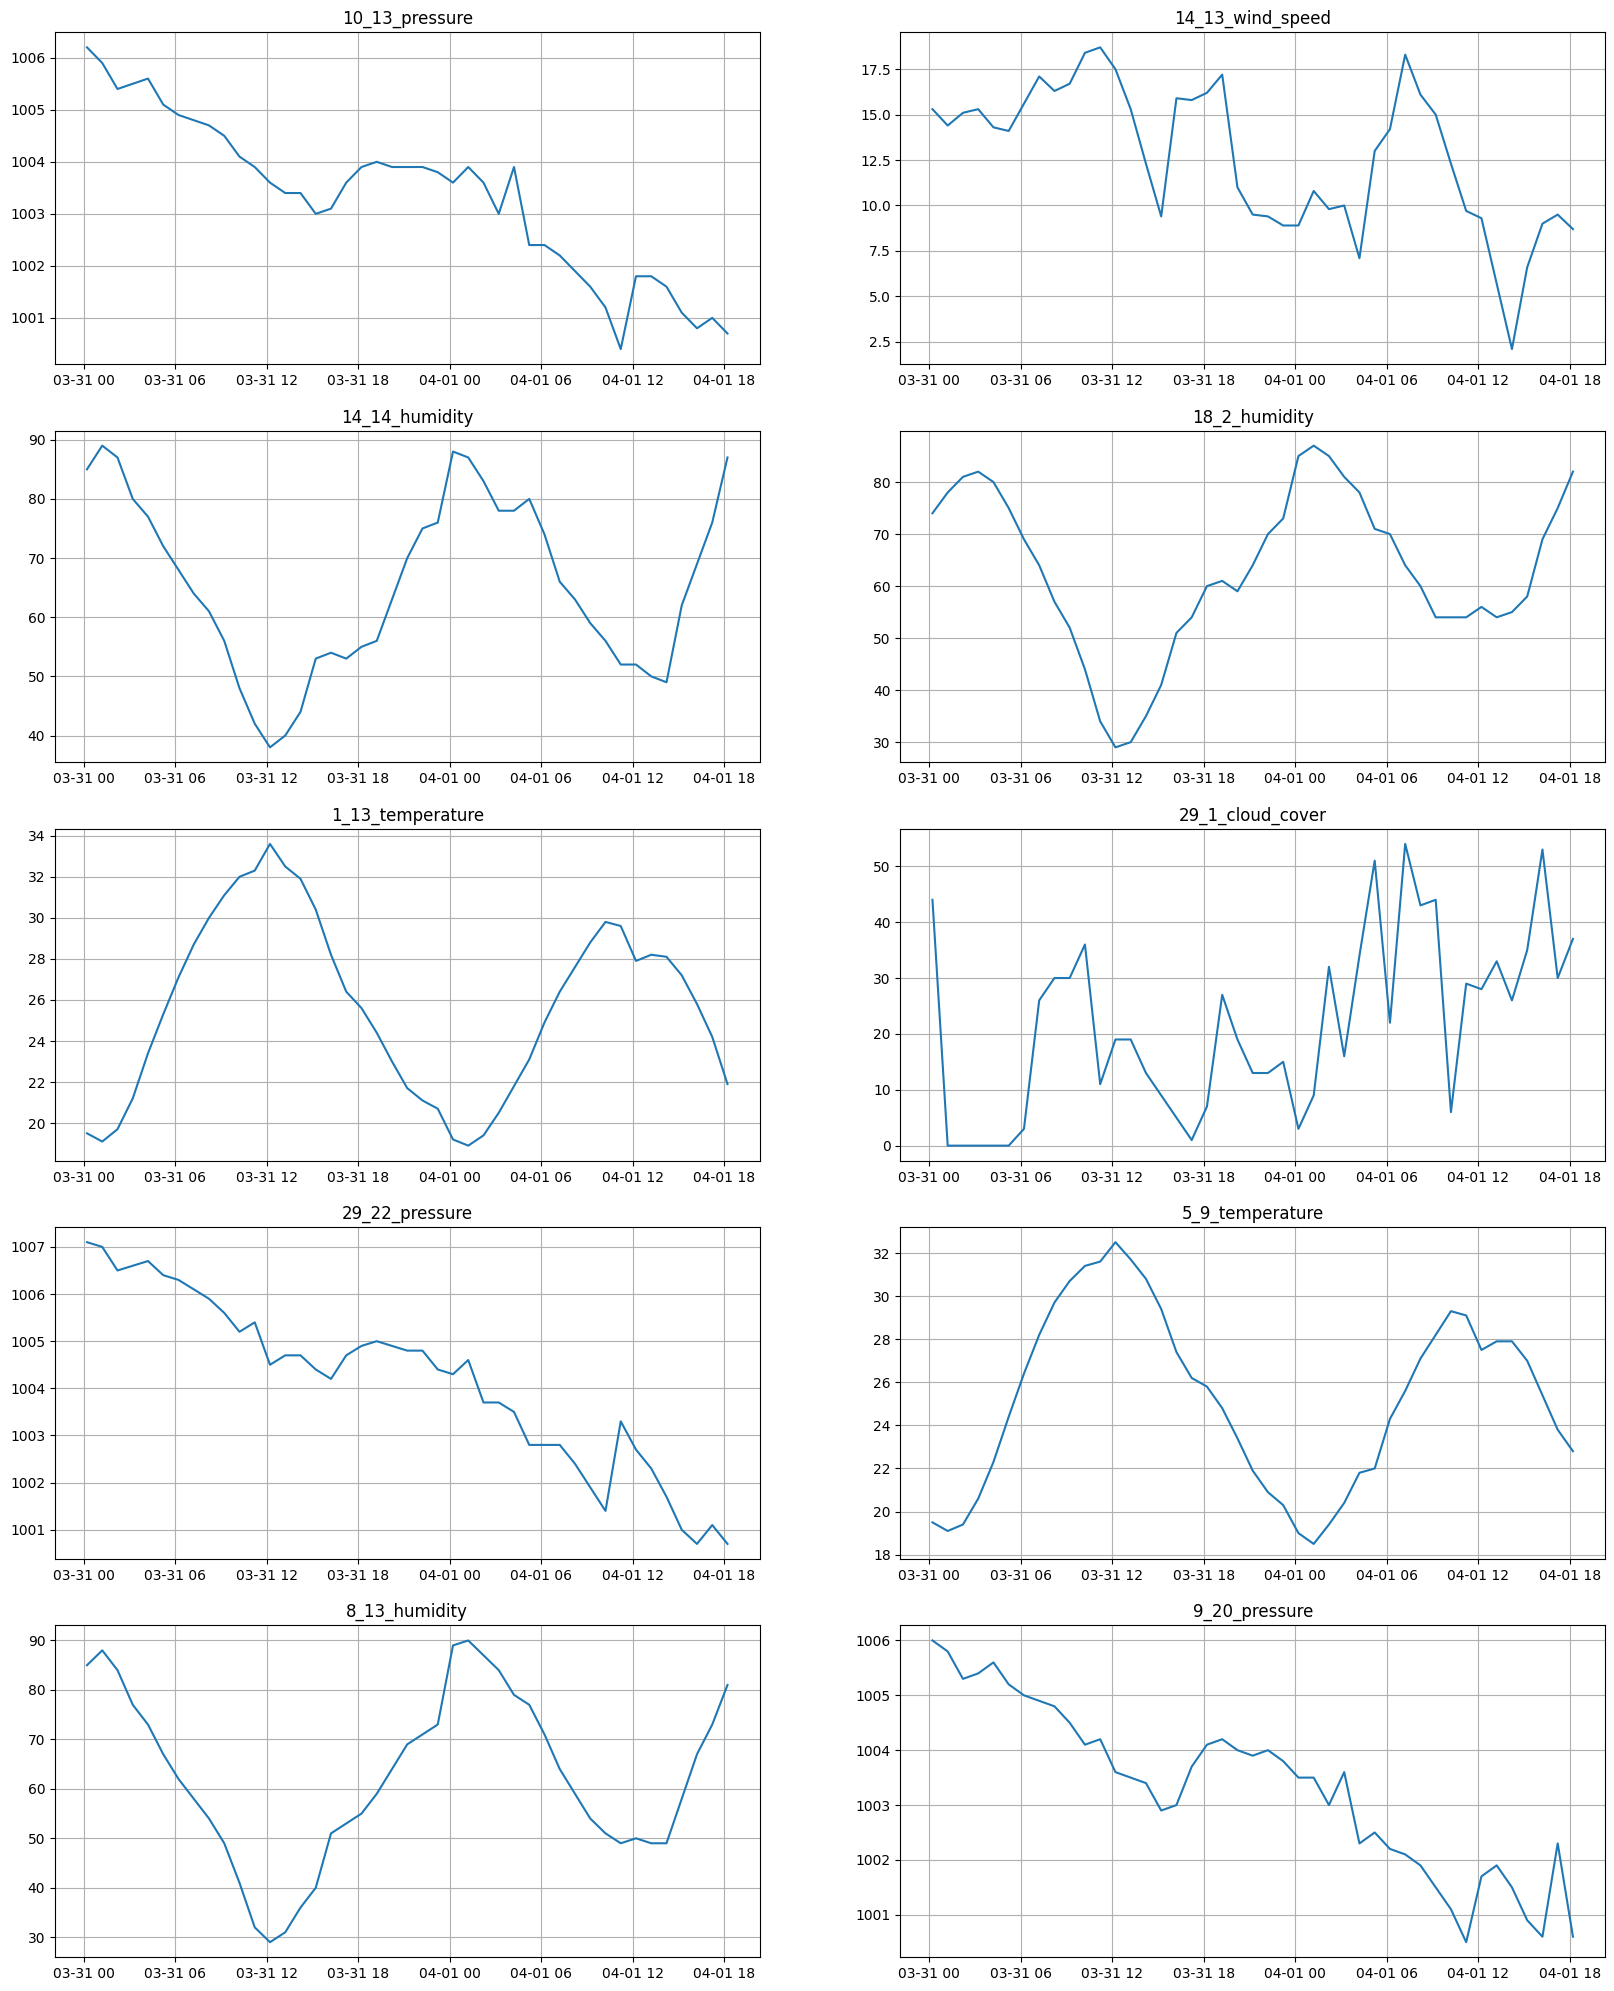

In [55]:
etna_data = pd.DataFrame(dict_weather_etna)
df = TSDataset.to_dataset(etna_data)
ts = TSDataset(df, freq="H")
ts.plot()

In [9]:
HORIZON = 5
train_ts, test_ts = ts.train_test_split(test_size=HORIZON)

In [35]:
from etna.transforms import SegmentEncoderTransform, MeanTransform, LogTransform, LagTransform, TrendTransform, LinearTrendTransform, TimeFlagsTransform, STLTransform
from etna.models import CatBoostMultiSegmentModel, ProphetModel, SeasonalMovingAverageModel, SARIMAXModel, LinearMultiSegmentModel, SklearnMultiSegmentModel, AutoARIMAModel
# from etna.models.nn import RNNModel
from etna.pipeline import Pipeline
from etna.metrics import SMAPE

from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline(
    transforms=[
        TimeFlagsTransform(minute_in_hour_number=False),
        LagTransform(in_column="target", lags=list(range(5, 25, 1)), out_column="lag"),
        MeanTransform(in_column=f"lag_{5}", window=5),
        MeanTransform(in_column=f"lag_{10}", window=5),
        MeanTransform(in_column=f"lag_{15}", window=5),
        MeanTransform(in_column=f"lag_{20}", window=5),
        LogTransform(in_column=f"lag_{5}"),
        LogTransform(in_column=f"lag_{10}"),
        LogTransform(in_column=f"lag_{15}"),
        LogTransform(in_column=f"lag_{20}"),
    ],
    # model=SklearnMultiSegmentModel(regressor=RandomForestRegressor(n_estimators=250, random_state=42)),
    model=CatBoostMultiSegmentModel(),
    horizon=HORIZON
)

metrics, forecast, _ = pipe.backtest(
    ts=ts, metrics=[SMAPE()], n_folds=3)

metrics["SMAPE"].mean()

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  5.5min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 10.9min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 10.9min
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  2.3min
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done   3 tasks      | e

24.890054402269193

TimeFlagsTransform(minute_in_hour_number=False),
LagTransform(in_column="target", lags=list(range(5, 10, 1)))
model - catboost

SMAPE - 30.2386532
_______________________________
LagTransform(in_column="target", lags=list(range(5, 25, 1)))
model - catboost

SMAPE - 23.710950906337285

## etna LSTM

In [3]:
!pip install -q etna[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import torch

from etna.analysis import plot_backtest
from etna.datasets.tsdataset import TSDataset
from etna.metrics import MAE
from etna.metrics import MAPE
from etna.metrics import SMAPE
from etna.models import SeasonalMovingAverageModel
from etna.pipeline import Pipeline
from etna.transforms import DateFlagsTransform
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform

/usr/local/lib/python3.10/dist-packages/etna/settings.py:45: UserWarning: wandb is not available, to install it, run `pip install etna[wandb]`
  warnings.warn("wandb is not available, to install it, run `pip install etna[wandb]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:62: UserWarning: etna[classification] is not available, to install it, run `pip install etna[classification]`
  warnings.warn("etna[classification] is not available, to install it, run `pip install etna[classification]`")
/usr/local/lib/python3.10/dist-packages/etna/settings.py:79: UserWarning: etna[statsforecast] is not available, to install it, run `pip install etna[statsforecast]`
  warnings.warn("etna[statsforecast] is not available, to install it, run `pip install etna[statsforecast]`")


In [19]:
from datetime import datetime

def hour_to_datetime(hour):
    # Получаем текущую дату
    current_date = pd.Timestamp.now().date()

    # Создаем объект Timestamp с заданным часом
    timestamp = pd.Timestamp.combine(current_date, pd.Timestamp.min.time()) + pd.Timedelta(hours=hour)

    return timestamp

In [68]:
import tqdm
segments = ["cloud_cover", "humidity", "pressure", "temperature", "wind_dir", "wind_speed"]

dict_weather_etna = {
    "timestamp": [],
    "segment": [],
    "target": []
}
for segment in segments:
  for hour in tqdm.tqdm(range(43)):
    for y in range(30):
      for x in range(30):
        dict_weather_etna["timestamp"].append(hour_to_datetime(hour))
        dict_weather_etna["target"].append(np.load(f"/content/{segment}.npy")[hour][y][x])
        dict_weather_etna["segment"].append(f"{x}_{y}_{segment}")
etna_data = pd.DataFrame(dict_weather_etna)
df = TSDataset.to_dataset(etna_data)
ts = TSDataset(df, freq="H")


100%|██████████| 43/43 [00:07<00:00,  5.93it/s]

100%|██████████| 43/43 [00:08<00:00,  5.36it/s]

100%|██████████| 43/43 [00:07<00:00,  6.00it/s]

100%|██████████| 43/43 [00:08<00:00,  5.35it/s]

100%|██████████| 43/43 [00:07<00:00,  5.64it/s]

100%|██████████| 43/43 [00:07<00:00,  5.81it/s]


In [69]:
import random
def set_seed(seed: int = 42):
    """Set random seed for reproducibility."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [70]:
set_seed()

In [71]:
from etna.models.nn import DeepARModel
from etna.transforms import SegmentEncoderTransform, MeanTransform, LogTransform, LagTransform, TrendTransform, LinearTrendTransform, TimeFlagsTransform, STLTransform

HORIZON = 5
# lag_columns = [f"target_lag_{HORIZON+i}" for i in range(num_lags)]

# dataset_builder_tft = PytorchForecastingDatasetBuilder(
#     max_encoder_length=HORIZON,
#     max_prediction_length=HORIZON,
#     time_varying_known_reals=["time_idx"],
#     time_varying_unknown_reals=["target"],
#     time_varying_known_categoricals=["dateflag_day_number_in_week"],
#     static_categoricals=["segment"],
#     target_normalizer=GroupNormalizer(groups=["segment"]),
# )
model_deepar = DeepARModel(
    encoder_length=HORIZON,
    decoder_length=HORIZON,
    trainer_params=dict(max_epochs=10, gpus=1, gradient_clip_val=0.1),
    lr=0.01,
    train_batch_size=64,
)
metrics = [SMAPE(), MAPE()]

pipeline_deepar = Pipeline(model=model_deepar,
                           transforms=[
                                TimeFlagsTransform(minute_in_hour_number=False, half_hour_number=True),
                                LagTransform(in_column="target", lags=list(range(5, 10, 1)), out_column="lag"),
                            ],
                           horizon=HORIZON)

<ipython-input-71-bb05ae656ae6>:16: DeprecationWarning: Call to deprecated class DeepARModel. (DeepARModel is deprecated. Use DeepARNativeModel instead.) -- Deprecated since version 3.0.
  model_deepar = DeepARModel(


In [8]:
metrics_deepar, forecast_deepar, fold_info_deepar = pipeline_deepar.backtest(ts, metrics=metrics, n_folds=2, n_jobs=1)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: User

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/data/timeseries.py:1657: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  target_scale = torch.tensor([batch[0]["target_scale"] for batch in batches], dtype=torch.float)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:83: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/epoch/training_epoch_loop.py:445: RuntimeWarning: ReduceLROnPlateau conditioned on metric val_loss which is not available but strict is set to `False`. Skipping learning rate update.
  rank_zero_warn(
/usr/local/

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  8.4min
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: Us

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  8.5min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  8.5min
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   14.4s
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_rang

In [72]:
pipeline_deepar.fit(ts)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:269: User

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/epoch/training_epoch_loop.py:445: RuntimeWarning: ReduceLROnPlateau conditioned on metric val_loss which is not available but strict is set to `False`. Skipping learning rate update.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Pipeline(model = DeepARModel(decoder_length = 5, encoder_length = 5, dataset_builder = PytorchForecastingDatasetBuilder(max_encoder_length = 5, min_encoder_length = 5, min_prediction_idx = None, min_prediction_length = None, max_prediction_length = 5, static_categoricals = [], static_reals = [], time_varying_known_categoricals = [], time_varying_known_reals = ['time_idx'], time_varying_unknown_categoricals = [], time_varying_unknown_reals = ['target'], variable_groups = {}, constant_fill_strategy = [], allow_missing_timesteps = True, lags = {}, add_relative_time_idx = True, add_target_scales = True, add_encoder_length = True, target_normalizer = GroupNormalizer(groups=['segment']), categorical_encoders = {}, scalers = {}, ), train_batch_size = 64, test_batch_size = 64, lr = 0.01, cell_type = 'LSTM', hidden_size = 10, rnn_layers = 2, dropout = 0.1, loss = NormalDistributionLoss(), trainer_params = {'max_epochs': 10, 'gpus': 1, 'gradient_clip_val': 0.1, 'logger': []}, quantiles_kwargs = 

In [10]:
score = metrics_deepar["SMAPE"].mean()
print(f"Average SMAPE for DeepAR: {score:.3f}")

Average SMAPE for DeepAR: 25.961


In [73]:
forecasts = pipeline_deepar.forecast()

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


# Inference

In [81]:
catboost_pipe = Pipeline(
    transforms=[
        TimeFlagsTransform(minute_in_hour_number=False, half_hour_number=True),
        LagTransform(in_column="target", lags=list(range(5, 25, 1)), out_column="lag"),
        # MeanTransform(in_column=f"lag_{5}", window=5),
        # MeanTransform(in_column=f"lag_{10}", window=5),
        # MeanTransform(in_column=f"lag_{15}", window=5),
        # MeanTransform(in_column=f"lag_{20}", window=5),
        # LogTransform(in_column=f"lag_{5}"),
        # LogTransform(in_column=f"lag_{10}"),
        # LogTransform(in_column=f"lag_{15}"),
        # LogTransform(in_column=f"lag_{20}"),
    ],
    model=CatBoostMultiSegmentModel(),
    horizon=HORIZON
)
catboost_pipe.fit(ts)

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated i

In [59]:
forecasts = catboost_pipe.forecast()

[Parallel(n_jobs=2)]: Using backend MultiprocessingBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  7.4min finished


## submit

In [74]:
forecasts = forecasts.to_pandas()

In [75]:
submit = {"temperature": [],
          "pressure": [],
          "humidity": [],
          "wind_speed": [],
          "wind_dir": [],
          "cloud_cover": []}

for i in tqdm.tqdm(range(5)):
  for segment in segments:
    for y in range(30):
      for x in range(30):
        submit[f"{segment}"].append(forecasts[f"{x}_{y}_{segment}"]['target'].tolist()[i])


100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


In [77]:
pd.DataFrame(submit).to_csv("submission_deepar_lags.csv", index_label="ID")